<a href="https://colab.research.google.com/github/idziksmart/data-science/blob/master/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

# Zaladowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# Wizualizacja danych

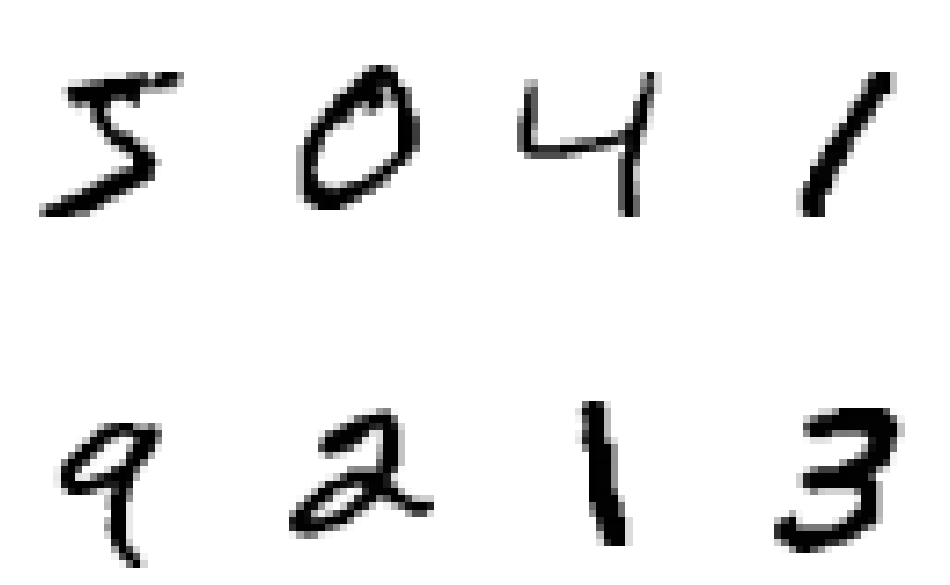

In [3]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

In [4]:
# odciecie do 10000 próbek
X_train = X_train[:10000]
y_train = y_train[:10000]
# wyplaszczenie aby kazdy piksel byl jako osobna zmienna
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

# Standaryzacja

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

In [8]:

results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [10]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997652  -4.652699 -0.740638   5.0
1  8.682758  -7.123700 -4.194685   0.0
2  2.439059  10.567253 -4.058946   4.0
3 -7.291486  -3.686136  3.065267   1.0
4 -4.791478   4.498237 -5.603298   9.0

In [11]:
# wyswietlamy na palaszczyznie
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950,
           title='PCA - 2 components', template='plotly_dark')

In [12]:
# wyswietlamy w 3D, dane nie sa wyrazne
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              opacity=0.5, width=950, height=700, title='PCA - 3 components', template='plotly_dark')

# t-SNE

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 7.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.063324
[t-SNE] KL divergence after 1000 iterations: 1.701087


In [14]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2 class
0      0.016990 -36.979828   5.0
1     72.348038  -6.337985   0.0
2      2.803648  77.214638   4.0
3    -62.625599  -7.283313   1.0
4    -21.922403  71.388123   9.0
...         ...        ...   ...
9995 -18.102060 -56.922123   5.0
9996  -3.695357 -12.807976   8.0
9997  33.450787 -50.976955   6.0
9998 -15.047495  53.512749   9.0
9999 -66.710739  45.565735   7.0

[10000 rows x 3 columns]

In [15]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')

# Porównanie PCA vs. t-SNE

In [16]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA', 't-SNE'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

## 50 komponentów

In [17]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [18]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.892793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.152740
[t-SNE] KL divergence after 1000 iterations: 1.645649


In [19]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     10.012027 -43.048233   5.0
1     78.974495   0.993550   0.0
2     25.043602  47.756599   4.0
3    -82.236641   4.428061   1.0
4     -9.823730  58.965881   9.0
...         ...        ...   ...
9995  -2.627700 -65.495880   5.0
9996 -10.899803  -6.484114   8.0
9997  28.138626 -64.263771   6.0
9998 -11.912969  54.724747   9.0
9999 -53.709560  37.325264   7.0

[10000 rows x 3 columns]

In [22]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 components after PCA')
# grupy sa bardziej jednorodne niz wczesniej czyli to jest t-SNE po PCA

In [24]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()

3 components

In [25]:
# zrobimy teraz zrzut poprzedniego na przestrzen R3
tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 0.840s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.892793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.333176
[t-SNE] KL divergence after 1000 iterations: 1.455067


In [26]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     -2.661198 -16.673660  -0.829412   5.0
1     22.153286  -5.652010  -2.038484   0.0
2     12.851502  12.444057  -9.484201   4.0
3    -21.014999  -8.707094   0.010540   1.0
4     -3.377013  15.273465  -5.821078   9.0
...         ...        ...        ...   ...
9995   6.451496 -10.880188  -8.559341   5.0
9996   0.672369   1.296340  -4.551814   8.0
9997   8.261073 -11.840622  19.102776   6.0
9998  -3.375920  12.318460  -6.484987   9.0
9999 -18.154015   6.139773  -7.909297   7.0

[10000 rows x 4 columns]

In [27]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')

In [28]:
TSNE?